In [1]:
from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Componente da composição de 1 holograma

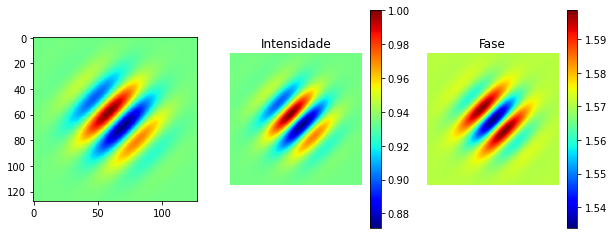

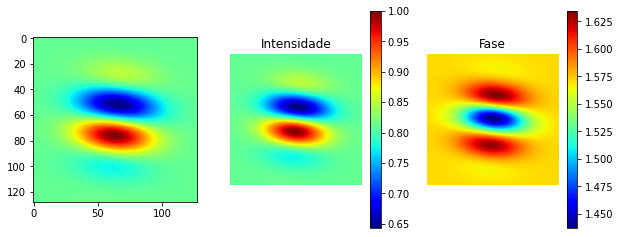

In [2]:
lambd = 780*nm;                           
w0    = .15*mm;                       
delta = .15*mm; 

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Lcoh = 23
p_v  = 1/( np.pi*delta )
aux2 = np.exp(1j*np.zeros((n,n,Lcoh*Lcoh)))

# Coherent sum
ii = 0
for jj in range(0,Lcoh):
    for kk in range(0,Lcoh):
        v_x = (jj*2*p_v/(Lcoh-1)) - p_v; 
        v_y = (kk*2*p_v/(Lcoh-1)) - p_v; 
          
        Hologram = ( np.sqrt( 2*np.pi )*delta  )*( 
            np.exp( - ( v_x**2 + v_y**2 )*( np.pi*delta )**2 -
            ( ( xx**2 + yy**2 )/(2*w0 )**2 )+ 2j*np.pi*( xx*v_x + yy*v_y ) ) +2j*np.pi*( np.random.random(1))
            )
        aux2[:,:,ii] = Hologram 
        ii+=1
#-------------------------------------
for i in range(0,500,250) : 
    fig, ax = plt.subplots(figsize=(10,4))

    
    F = Begin(2*abs(x[0]),lambd,n);

    F.field = aux2[:,:,i]
    fase = Phase(F)
    ASD = abs(aux2[:,:,i])**2
    ASD = ASD/ASD.max()
    
    plt.subplot(1,3,1)
    plt.imshow(Intensity(1,F),cmap='jet')

    plt.subplot(1,3,2)
    plt.imshow(ASD,cmap='jet')
    plt.title("Intensidade")
    plt.axis("off")
    plt.colorbar()

    plt.subplot(1,3,3)
    plt.imshow(fase,cmap='jet')
    plt.title("Fase")
    plt.axis("off")
    plt.colorbar()
    plt.show()

## 1 Holograma 

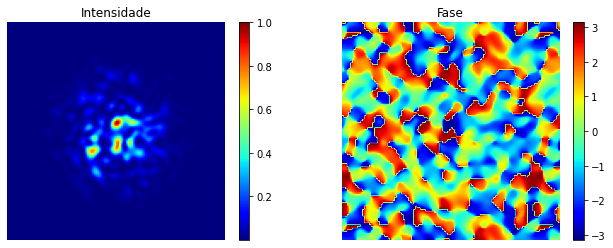

In [25]:
lambd = 780*nm;                           
w0    = .15*mm;                       
delta = .03*mm; 

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 2
Lcoh = 25

#-------------------------------------
p_v = 1/(  np.pi*delta )

aux2 = np.exp(1j*np.zeros((n,n,Linc)))
aux3 = np.zeros((n,n,Linc))

for ii in range(0,Linc):
  u = np.zeros_like(xx);
# Coherent sum
  for jj in range(0,Lcoh):
    for kk in range(0,Lcoh):
      v_x = (jj*2*p_v/(Lcoh-1)) - p_v; 
      v_y = (kk*2*p_v/(Lcoh-1)) - p_v; 

      Hologram = ( np.sqrt( 2*np.pi )*delta  )*(
                  np.exp( - ( v_x**2 + v_y**2 )*( np.pi*delta )**2 
                          - ( ( xx**2 + yy**2 )/(2*w0 )**2 )
                          + 2j*np.pi*( xx*v_x + yy*v_y )
                          + 2j*np.pi*( np.random.random(1) )
                         ))
      u = u + Hologram  
  # normalization
  u = u/u.max()
    
  aux2[:,:,ii] = u;
  aux3[:,:,ii] = abs(u)**2
#-------------------------------------
fig, ax = plt.subplots(figsize=(11,4))

plt.subplot(1,2,1)
F = Begin(2*abs(x[0]),lambd,n);

F.field = aux2[:,:,0]
fase = Phase(F)

plt.imshow(Intensity(1,F),cmap='jet')
plt.axis("off")
plt.title("Intensidade")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(fase,cmap='jet')
plt.title("Fase",)
plt.axis("off")
plt.colorbar()
plt.show()

## Valor de NxM

In [6]:
lambd = 780*nm;                           
w0    = .15*mm;                       
delta = .03*mm; 

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 50
iii = [4,8,12,16,20]
A = []

p_v = 1/( np.pi*delta )

for Lcoh in iii: 
  aux2 = np.exp(1j*np.zeros((n,n,Linc)))
  aux3 = np.zeros((n,n,Linc))
  for ii in range(0,Linc):
    u = np.zeros_like(xx)
    for jj in range(0,Lcoh):
      for kk in range(0,Lcoh):
        v_x = (jj*2*p_v/(Lcoh-1)) - p_v; 
        v_y = (kk*2*p_v/(Lcoh-1)) - p_v; 
        Hologram = ( np.sqrt( 2*np.pi )*delta  )*(
                  np.exp( - ( v_x**2 + v_y**2 )*( np.pi*delta )**2 
                          - ( ( xx**2 + yy**2 )/(2*w0 )**2 )
                          + 2j*np.pi*( xx*v_x + yy*v_y )
                          + 2j*np.pi*( np.random.random(1) )
                         ))
        u = u + Hologram  
    u = u/u.max()
    Fin = Begin(2*abs(x[0]),lambd,n);
    Fin.field = u
    Fout = Forvard(0*cm,Fin);
    aux2[:,:,ii] = u;
    aux3[:,:,ii] = Intensity(0,Fout);
  #-------------------------------------
  ref = [0,0]                        
  index = np.where((xx==ref[0])*(yy==ref[1])==True)        

  mu = np.zeros_like(aux2[:,0,0])            
  intMap = np.sum(aux3,2)           
  for ii in range(0,n):
    jj = index[1]
    mu[ii] = np.sum(np.conj(aux2[ii,jj,:])*aux2[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])
  
  A.append( abs(mu/mu.max())**2 )
#-------------------------------------

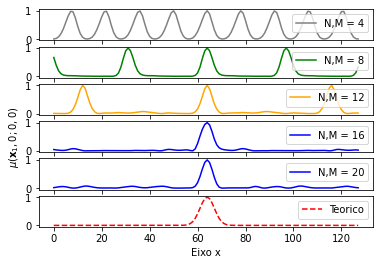

In [11]:
mu_x_000 = np.exp( -x**2/(2*delta**2) )
fig, ax = plt.subplots(figsize=(6,4))

plt.subplot(6,1,1)
plt.plot( A[0] ,color="grey",label='N,M = 4')
plt.legend(loc=1)

plt.subplot(6,1,2)
plt.plot( A[1] ,color="green",label='N,M = 8')
plt.legend(loc=1)

plt.subplot(6,1,3)
plt.plot( A[2],color="orange",label='N,M = 12' )
plt.legend(loc=1)

plt.subplot(6,1,4)
plt.plot( A[3],color="blue",label='N,M = 16' )
plt.legend(loc=1)
plt.ylabel("$\mu (\mathbf{x}_1,0;0,0)$")
plt.subplot(6,1,5)
plt.plot( A[4],color="blue",label='N,M = 20' )
plt.legend(loc=1)

plt.subplot(6,1,6)
plt.plot( mu_x_000,"--",color="red",label='Teorico')
plt.legend(loc=1)

plt.xlabel("Eixo x")
plt.show()

In [79]:
lambd = 780*nm;                           
w0    = .15*mm;                       
delta = .15*mm; 

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 50
iii = [4,12,20]
A = []
p_v = 1/( np.pi*delta )
for Lcoh in iii: 
  aux2 = np.exp(1j*np.zeros((n,n,Linc)))
  aux3 = np.zeros((n,n,Linc))
  for ii in range(0,Linc):
    u = np.zeros_like(xx)
    for jj in range(0,Lcoh):
      for kk in range(0,Lcoh):
        v_x = (jj*2*p_v/(Lcoh-1)) - p_v; 
        v_y = (kk*2*p_v/(Lcoh-1)) - p_v; 
        Hologram = ( np.sqrt( 2*np.pi )*delta  )*(
                  np.exp( - ( v_x**2 + v_y**2 )*( np.pi*delta )**2 
                          - ( ( xx**2 + yy**2 )/(2*w0 )**2 )
                          + 2j*np.pi*( xx*v_x + yy*v_y )
                          + 2j*np.pi*( np.random.random(1) )
                         ))
        u = u + Hologram  
    u = u/u.max()
    Fin = Begin(2*abs(x[0]),lambd,n);
    Fin.field = u
    Fout = Forvard(0*cm,Fin);
    aux2[:,:,ii] = u;
    aux3[:,:,ii] = Intensity(0,Fout);
  #-------------------------------------
  ref = [0,0]                        
  index = np.where((xx==ref[0])*(yy==ref[1])==True)        

  mu = np.zeros_like(aux2[:,0,0])            
  intMap = np.sum(aux3,2)           
  for ii in range(0,n):
    jj = index[1]
    mu[ii] = np.sum(np.conj(aux2[ii,jj,:])*aux2[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])
  
  A.append( abs(mu/mu.max())**2 )
#-------------------------------------

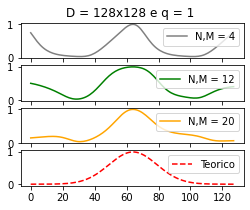

In [81]:
mu_x_000 = np.exp( -x**2/(2*delta**2) )
fig, ax = plt.subplots(figsize=(4,3))

plt.subplot(4,1,1)
plt.title("D = 128x128 e q = 1 " )
plt.plot( A[0] ,color="grey",label='N,M = 4')
plt.legend(loc=1)

plt.subplot(4,1,2)
plt.plot( A[1] ,color="green",label='N,M = 12')
plt.legend(loc=1)

plt.subplot(4,1,3)
plt.plot( A[2],color="orange",label='N,M = 20' )
plt.legend(loc=1)

plt.subplot(4,1,4)
plt.plot( mu_x_000,"--",color="red",label='Teorico')
plt.legend(loc=1)
plt.show()

In [82]:
lambd = 780*nm;                           
w0    = .3*mm;                       
delta = .064*mm; 

n  = 2**8;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 50
iii = [20]
A = []
p_v = 1/( np.pi*delta )
for Lcoh in iii: 
  aux2 = np.exp(1j*np.zeros((n,n,Linc)))
  aux3 = np.zeros((n,n,Linc))
  for ii in range(0,Linc):
    u = np.zeros_like(xx)
    for jj in range(0,Lcoh):
      for kk in range(0,Lcoh):
        v_x = (jj*2*p_v/(Lcoh-1)) - p_v; 
        v_y = (kk*2*p_v/(Lcoh-1)) - p_v; 
        Hologram = ( np.sqrt( 2*np.pi )*delta  )*(
                  np.exp( - ( v_x**2 + v_y**2 )*( np.pi*delta )**2 
                          - ( ( xx**2 + yy**2 )/(2*w0 )**2 )
                          + 2j*np.pi*( xx*v_x + yy*v_y )
                          + 2j*np.pi*( np.random.random(1) )
                         ))
        u = u + Hologram  
    u = u/u.max()
    Fin = Begin(2*abs(x[0]),lambd,n);
    Fin.field = u
    Fout = Forvard(0*cm,Fin);
    aux2[:,:,ii] = u;
    aux3[:,:,ii] = Intensity(0,Fout);
  #-------------------------------------
  ref = [0,0]                        
  index = np.where((xx==ref[0])*(yy==ref[1])==True)        

  mu = np.zeros_like(aux2[:,0,0])            
  intMap = np.sum(aux3,2)           
  for ii in range(0,n):
    jj = index[1]
    mu[ii] = np.sum(np.conj(aux2[ii,jj,:])*aux2[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])
  
  A.append( abs(mu/mu.max())**2 )
#-------------------------------------

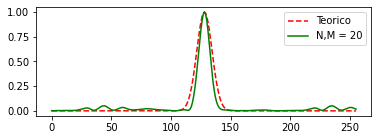

In [92]:
mu_x_000 = np.exp( -x**2/(2*delta**2) )
fig, ax = plt.subplots(figsize=(6,2))

plt.subplot(1,1,1)
plt.plot( mu_x_000,"--",color="red",label='Teorico')
plt.plot( A[0] ,color="green",label='N,M = 20')
plt.legend(loc=1)
plt.show()

## Valor de L

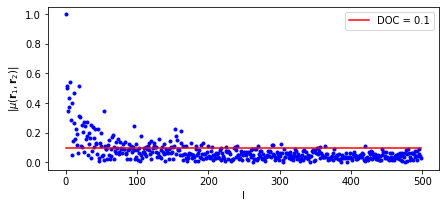

In [2]:
L = 500
AA = []
BB = []
for j in range(1,L,1):
    Doc = [] 
    i = 0
    while i<j:
        DOC =  np.exp( 1j*( 2*np.pi*np.random.random(1) -  2*np.pi*np.random.random(1) ) )
        Doc.append(DOC)
        i += 1
    A = float(abs(sum(Doc)))/j
    AA.append(A)
    BB.append(0.1)
plt.subplots(figsize=(7,3))
plt.ylabel("|$\mu(\mathbf{r}_1,\mathbf{r}_2)$|")
plt.xlabel("l")
plt.plot(AA,'b.')
plt.plot(BB,'r',label='DOC = 0.1')
plt.legend(loc=1)
plt.show()


## Intensidade

In [42]:
#%________________Gerando o campo ____________________
lambd = 780*nm;                           
w0    = .15*mm;                       
delta = .05*mm; 

n  = 2**7;   
dx = 10*um;                              
x  = np.arange(-n/2,n/2,1)*dx
[xx,yy] = np.meshgrid(x,x);   

Linc = 250
Lcoh = 20

#-------------------------------------
p_v = 1/(  np.pi*delta )

aux2 = np.exp(1j*np.zeros((n,n,Linc)))
aux3 = np.zeros((n,n,Linc))

for ii in range(0,Linc):
  u = np.zeros_like(xx);
# Coherent sum
  for jj in range(0,Lcoh):
    for kk in range(0,Lcoh):
      v_x = (jj*2*p_v/(Lcoh-1)) - p_v; 
      v_y = (kk*2*p_v/(Lcoh-1)) - p_v; 

      Hologram = ( np.sqrt( 2*np.pi )*delta  )*(
                  np.exp( - ( v_x**2 + v_y**2 )*( np.pi*delta )**2 
                          - ( ( xx**2 + yy**2 )/(2*w0 )**2 )
                          + 2j*np.pi*( xx*v_x + yy*v_y )
                          + 2j*np.pi*( np.random.random(1) )
                         ))
      u = u + Hologram  
  # normalization
  u = u/u.max()
    
  aux2[:,:,ii] = u
  aux3[:,:,ii] = abs(u)**2
#-------------------------------------

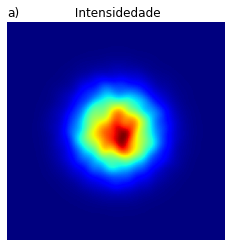

In [35]:
A = np.sum( aux3 ,2)
A = A/A.max()

Int_T =  np.exp( - x**2/(2*w0**2 )  )
#$$$$$$$$$$$$$$$$$

plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.title(" Intensidedade")
plt.title("a)", loc = 'left')
plt.imshow(A,cmap='jet')
plt.axis("off")

#plt.subplot(1,2,2)
##plt.ylabel(" $I(\mathbf{x}_1,0;0,0)$")
#plt.plot(Int_T,'r--',label='Teorica')
#plt.plot(A[:,64],'b',label='Simulação')
#plt.legend(loc=1)
#plt.axis("off")

plt.show()

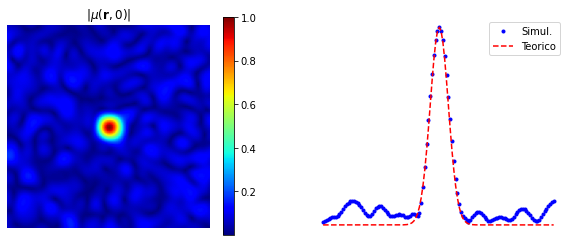

In [36]:
ref = [0,0]                        
index = np.where((xx==ref[0])*(yy==ref[1])==True)        

mu = np.zeros_like(aux2[:,:,1])
intMap = np.sum(aux3,2) # somando as intensidensia

for ii in range(0,n):
    for jj in range(0,n):
      mu[ii,jj] = np.sum( np.conj(aux2[ii,jj,:])*aux2[index[0],index[1],:] )/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu) 
img = img/img.max()

BB = np.exp(-x**2/(2*delta**2) )

fig, ax = plt.subplots(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img,cmap = "jet")
plt.title('|$\mu(\mathbf{r},0)$|')
plt.colorbar()
plt.axis("off")

plt.subplot(1,2,2)
plt.ylabel("| $\mu(\mathbf{x}_1,0;0,0)$|")
plt.plot(img[:,64],"b.", label='Simul.')
plt.plot(BB,"r--",label='Teorico')
plt.axis("off")
plt.legend(loc=1)
plt.show()


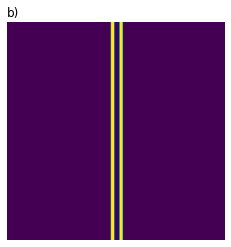

In [37]:
# Inicialização

class grid:
  pass
grid.N  = n 
grid.dx = dx                               
grid.x  = np.arange(-grid.N/2,grid.N/2,1)*grid.dx;
[grid.xx,grid.yy] = np.meshgrid(grid.x,grid.x);  

d0 = .05*mm; 
a0 = (0.05/3)*mm; 
# make slit
fslit = (np.ones_like(grid.xx)*(abs(grid.xx+(d0/2))<=a0/2) +
         np.ones_like(grid.xx)*(abs(grid.xx-(d0/2))<=a0/2));
F  = Begin(abs(x[0])*2,lambd,n) 
plt.axis("off")
plt.title("b)", loc = 'left')
plt.imshow(fslit)
plt.show()

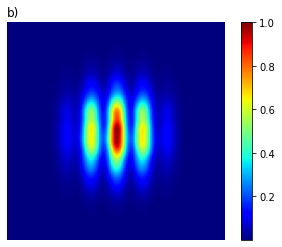

In [38]:
# passando pelas fendas --> soma incoerente
imagem =[0]
FF = F.copy(F)

for ii in range(Linc):
  FF.field = aux2[:,:,ii]*fslit
  FF1      = Forvard(1*cm,FF)
  imagem     += Intensity(FF1)

imagem = imagem/imagem.max()
plt.imshow(imagem,cmap = "jet");
plt.axis("off")
plt.title("b)", loc = 'left')
plt.colorbar()
plt.show()

In [39]:
# Ajustado para analisar na Direita e esquerda
### Função da Suavização #########################
def SUAVE(media, linha):
  novalista = []
  for i in range(media ,2**9,1):
    b = imagem[linha,i-media:i]
    AA = sum(b)/media
    novalista.append(AA)
  return np.array(novalista)

def MM(suavizar,linha):
  maxi2 = SUAVE(suavizar,linha).max()
  posiçao2 = 0
  for i in SUAVE(suavizar,linha):
    if i == maxi2:
      break 
    posiçao2 +=1 

#### Encontrar o valor mínimo local a Direita parti do maximo global
  mini = 0
  Vimax = SUAVE(suavizar,linha)[posiçao2:2**9]
  for i in range(len(Vimax)):
    if i == len(Vimax)-1:
      break
    if Vimax[i] > Vimax[i+1]:
      mini = Vimax[i+1]
    elif Vimax[i] < Vimax[i+1]:
      mini = Vimax[i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMin = 0 
  for i in Vimax:
    if i == mini:
      break 
    PMin += 1  
  posiçaomin = posiçao2 + PMin -1
#######################################################################
#### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
  miniE = 0
  xamiV = SUAVE(suavizar,linha)[0:posiçao2]
#########################################################
  for i in range(len(xamiV)):
    i += 1
    if i == len(xamiV)-1:
      break
    if xamiV[-i] > xamiV[-i-1]:
      miniE = xamiV[-i-1]
    elif xamiV[-i] < xamiV[-i-1]:
      miniE = xamiV[-i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMinE = 0 
  for i in range(len(xamiV)):
    i+=1
    if xamiV[-i] == miniE: 
      break 
    PMinE += 1  
  posiçaominE = posiçao2 - PMinE

  if miniE > mini:
    posiçaomin = posiçaominE
    mini       = miniE
  # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
  return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE  

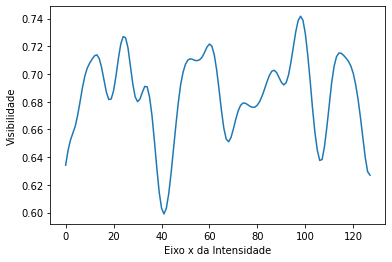

Valor medio Visibilidade  0.6854102111830175


In [40]:
# A VISIBILIDADE TODA
VisibilidadeN = []
q = 1
qq = 0
for j in range(0,grid.N):
  V = ( MM(q,j)[0]-MM(q,j)[2])/(MM(q,j)[0]+MM(q,j)[2])
  VisibilidadeN.append(V) 
  qq+=1
  
plt.plot(VisibilidadeN) 
plt.xlabel('Eixo x da Intensidade')
plt.ylabel("Visibilidade")
#plt.title("b)", loc = 'left')
plt.show()
print("Valor medio Visibilidade ",sum(VisibilidadeN)/qq)

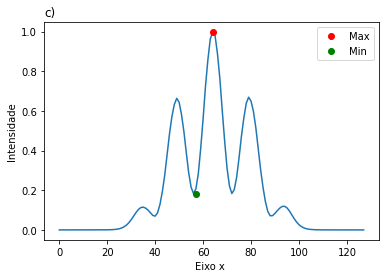

In [41]:
qe = 1
qw = 64 
# DISTRIBUIÇÃO DE INTENSIDADE
plt.plot(imagem[qw])
plt.plot(MM(qe,qw)[1] , MM(qe,qw)[0] , 'o', color ='red' ,label='Max'  )
plt.plot(MM(qe,qw)[3] , MM(qe,qw)[2] , 'o', color ='green', label='Min'  )
plt.xlabel('Eixo x ')
plt.ylabel("Intensidade")
plt.legend(loc=1)
plt.title("c)", loc = 'left')
plt.show()
# VISIBILIDADE
#V = ( MM(2,qw)[0]  - MM(2,qw)[2] )/( MM(2,qw)[0]  + MM(2,qw)[2])
#print("Visibilidade =",V)